In [1]:
%store -r data_cat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def showCatsBy(by,xlabel=''): #views
  if xlabel == '': xlabel = by 
  plt.figure(figsize=(16,8))
  plt.xticks(rotation=90)
  catplot = sns.boxplot(x="snippet.title", y=by, data=data_cat, palette='rainbow')
  catplot.set(title= xlabel +' por Categoría', ylabel="Categoría", xlabel=xlabel)

def outliersToMax(cat, since:int, col = 'views'):
  nCat = len(data_cat[data_cat['snippet.title'] == cat])
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  print(f"{cat} por {col}".upper())
  print( f' Cantidad de datos de {cat}:', nCat, '\n', 'Cantidad de datos outliers:', nCatOut )
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  print(f'''De {nCat} filas, {nCatOut} son outliers de la categoría {cat}.
    Estos serán ajustados al máximo menor a {since}.''')
  data_cat.loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]>since), col ] = (
    data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])

##### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

Se utilizó la cantidad de vistas como el indicador de tendencia. Como se observa en el gráfico, las tres primeras categorías con mayor tendencia son: Gaming, Movies y Music, siendo la categoría de Movies la que puede alcanzar puntos muy diferenciados de tendencia.

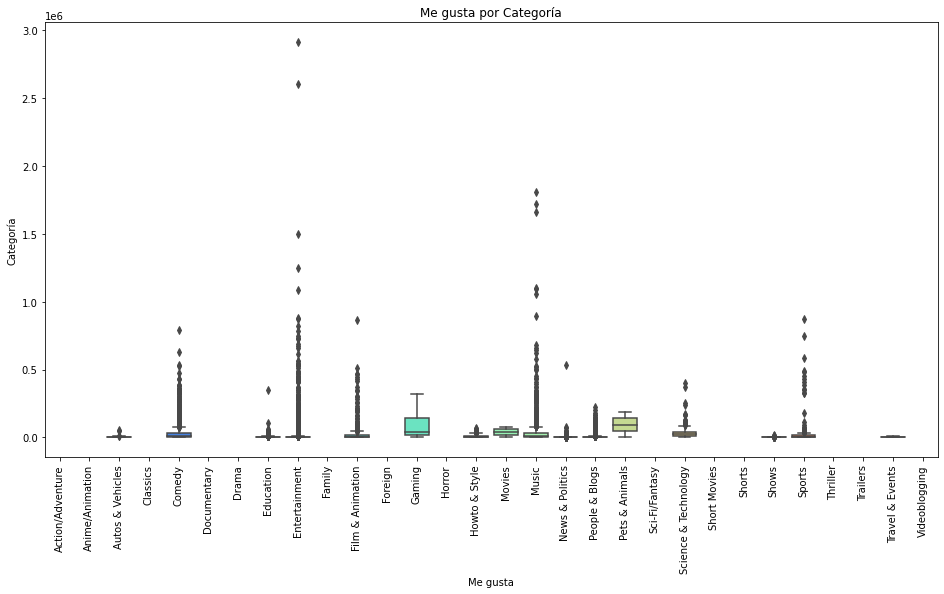

In [4]:
showCatsBy('likes','Me gusta')

In [5]:
outliers_to_fix = {
  'Comedy' : 0.6*1e6,
  'Education' : 0.2*1e6,
  'Entertainment' : 1*1e6,
  'Film & Animation' : 0.6*1e6,
  'Music' : 0.8*1e6,
  'News & Politics' : 0.25*1e6,
  'Science & Technology' : 0.075*1e6,
  'Sports' : 0.5*1e6,
}

In [6]:
for k,v in outliers_to_fix.items():
  #nCat = len(data_cat[data_cat['snippet.title'] == k])
  #nCatOut = len(data_cat[data_cat['snippet.title'] == k][data_cat['likes']>v])
  #print( f' Cantidad de datos de {k}:', nCat, ' | ', 'Cant. datos outliers:', nCatOut )
  outliersToMax(k, v, 'likes')
  print('\n---\n')

COMEDY POR LIKES
 Cantidad de datos de Comedy: 1152 
 Cantidad de datos outliers: 2


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
10421,bYSRPuDEnTg,Garmi Ke Side-Effects | Ashish Chanchlani,ashish chanchlani vines,23,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291),False,False,...,10256578,626237,20773,33764,9,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
15841,w4AImq08j9o,Why I'm not in YouTube Rewind 2017,PewDiePie,23,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044),False,False,...,13241801,793330,21961,80579,5,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True


De 1152 filas, 2 son outliers de la categoría Comedy.
    Estos serán ajustados al máximo menor a 600000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable



---

EDUCATION POR LIKES
 Cantidad de datos de Education: 813 
 Cantidad de datos outliers: 1


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
4723,H34qrTkhFz0,DO U KNO DA WEI?,PewDiePie,27,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217),False,False,...,5217644,352049,7352,35998,2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/EoYkczo9I3RCf96Rv...",UCBR8-60-B28hp2BmDPdntcQ,Education,True


De 813 filas, 1 son outliers de la categoría Education.
    Estos serán ajustados al máximo menor a 200000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable



---

ENTERTAINMENT POR LIKES
 Cantidad de datos de Entertainment: 7781 
 Cantidad de datos outliers: 5


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
2030,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),False,False,...,89930713,2606663,53011,347982,8,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
4388,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,Goa,15.491997,73.818001,POINT (73.81800065 15.491997),False,False,...,125432237,2912710,1545017,827755,6,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
7411,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895),False,False,...,45064699,1494997,29812,186005,7,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
7948,T9WN2_ikz6Q,BB Ki Vines- | The Sacrifice |,BB Ki Vines,24,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291),False,False,...,7769007,1084173,9373,125740,2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
15320,u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895),False,False,...,53822757,1250535,44796,135405,9,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


De 7781 filas, 5 son outliers de la categoría Entertainment.
    Estos serán ajustados al máximo menor a 1000000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable



---

FILM & ANIMATION POR LIKES
 Cantidad de datos de Film & Animation: 539 
 Cantidad de datos outliers: 1


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
11165,ePO5M5DE01I,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,Haryana,28.450006,77.019991,POINT (77.01999101 28.45000633),False,False,...,38664360,865914,63908,103907,3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True


De 539 filas, 1 son outliers de la categoría Film & Animation.
    Estos serán ajustados al máximo menor a 600000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable



---

MUSIC POR LIKES
 Cantidad de datos de Music: 1278 
 Cantidad de datos outliers: 7


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
906,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),False,False,...,39082222,1721384,23137,90352,2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
5267,J-dv_DcDD_A,ZAYN - Let Me (Official Video),ZaynVEVO,10,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),False,False,...,22769424,1059309,24724,79913,9,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
8630,VY1eFxgRR-k,Selena Gomez - Back To You,SelenaGomezVEVO,10,Assam,26.749981,94.216667,POINT (94.21666743999999 26.7499809),False,False,...,19687255,1101522,36325,64156,5,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
10983,dfnCAmr569k,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,10,Orissa,19.820430,85.900017,POINT (85.90001746 19.82042971),False,False,...,42019590,1804377,100033,146917,6,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
11246,eiDiKwbGfIY,Ed Sheeran - Perfect Symphony (with Andrea Boc...,Ed Sheeran,10,Tripura,23.835404,91.279999,POINT (91.27999914 23.83540428),False,False,...,17446067,891115,13501,36931,4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
12292,iWZmdoY1aTE,Ed Sheeran - Happier (Official Video),Ed Sheeran,10,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291),False,False,...,23543061,1095526,23886,58948,8,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
15082,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),False,False,...,43738208,1658756,94043,148548,6,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True


De 1278 filas, 7 son outliers de la categoría Music.
    Estos serán ajustados al máximo menor a 800000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable



---

NEWS & POLITICS POR LIKES
 Cantidad de datos de News & Politics: 2582 
 Cantidad de datos outliers: 1


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
16582,yzshoDMBkqE,LOGAN PAUL RETURNS 📰 PEW NEWS📰,PewDiePie,25,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349),False,False,...,8476168,530022,21139,64291,4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...",UCBR8-60-B28hp2BmDPdntcQ,News & Politics,True


De 2582 filas, 1 son outliers de la categoría News & Politics.
    Estos serán ajustados al máximo menor a 250000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable



---

SCIENCE & TECHNOLOGY POR LIKES
 Cantidad de datos de Science & Technology: 307 
 Cantidad de datos outliers: 24


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
705,1hHvH8xQDKA,OnePlus 5T Star Wars Limited Edition Unboxing ...,Technical Guruji,28,Mizoram,23.710399,92.720015,POINT (92.72001461000001 23.71039899),False,False,...,611786,173149,2000,153049,3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
2746,9Ca8zWJOlFQ,Apple iPhone X Review: The Best Yet!,Marques Brownlee,28,Kerala,8.900373,76.569993,POINT (76.56999263 8.900372741),False,False,...,1825705,77531,4156,12025,1,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
3410,BwYmaDSXdQY,OnePlus 5T Unboxing and First Look - Giveaway ...,Technical Guruji,28,Goa,15.491997,73.818001,POINT (73.81800065 15.491997),False,False,...,809247,162027,1702,144493,3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
3420,C-DfipidnOE,Dear Snapchat!,Marques Brownlee,28,Lakshadweep,10.562573,72.636867,POINT (72.63686717 10.56257331),False,False,...,1452821,81929,1850,7534,3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
4660,GqCAVnvb3QA,Samsung Galaxy S9 Top Features and Tips Tricks...,Technical Guruji,28,Orissa,19.820430,85.900017,POINT (85.90001746 19.82042971),False,False,...,921731,252602,2006,295139,1,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
5301,J83sZrz9XTc,Samsung Galaxy S9 Impressions!,Marques Brownlee,28,Goa,15.491997,73.818001,POINT (73.81800065 15.491997),False,False,...,2887961,102175,2307,14290,3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
5551,KB4_WIPE7vo,The 🍎 Ecosystem: Explained!,Marques Brownlee,28,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),False,False,...,1269190,88335,1932,12709,2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
6753,OZBviuO6whs,Another Bezel Less Beauty - Sharp Aquos S2 Unb...,Technical Guruji,28,Tripura,23.835404,91.279999,POINT (91.27999914 23.83540428),False,False,...,565802,80093,1608,73356,4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
8195,TyYV_h2bXM0,OnePlus 6 Top Features and GIVEAWAY 🔥- OnePlus...,Technical Guruji,28,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398),False,False,...,1158291,370533,2519,382685,3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True
8267,UIwdCN4dV6w,Dope Tech: Camera Robots!,Marques Brownlee,28,Chandigarh,30.719997,76.780006,POINT (76.78000565000001 30.71999697),False,False,...,835935,92016,346,8775,1,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...",UCBR8-60-B28hp2BmDPdntcQ,Science & Technology,True


De 307 filas, 24 son outliers de la categoría Science & Technology.
    Estos serán ajustados al máximo menor a 75000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable



---

SPORTS POR LIKES
 Cantidad de datos de Sports: 356 
 Cantidad de datos outliers: 3


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable
7697,S9KxqRUcnCU,Boomerang Trick Shots | Dude Perfect,Dude Perfect,17,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044),False,False,...,17433516,747641,12441,32529,4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",UCBR8-60-B28hp2BmDPdntcQ,Sports,True
8606,VRJmcxCrAOA,Real Life Trick Shots 2 | Dude Perfect,Dude Perfect,17,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398),False,False,...,20761480,871933,11595,43026,4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",UCBR8-60-B28hp2BmDPdntcQ,Sports,True
14395,qZHycHI3F1Q,Football vs Soccer Trick Shots | Dude Perfect,Dude Perfect,17,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129),False,False,...,14654718,585763,7996,54262,5,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",UCBR8-60-B28hp2BmDPdntcQ,Sports,True


De 356 filas, 3 son outliers de la categoría Sports.
    Estos serán ajustados al máximo menor a 500000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
C:\Users\GART-03\AppData\Local\Temp\ipykernel_21548\404988523.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])


,video_id,title,channel_title,category_id,state,lat,lon,geometry,comments_disabled,ratings_disabled,...,views,likes,dislikes,comment_count,trending_count,kind,etag,snippet.channelId,snippet.title,snippet.assignable



---



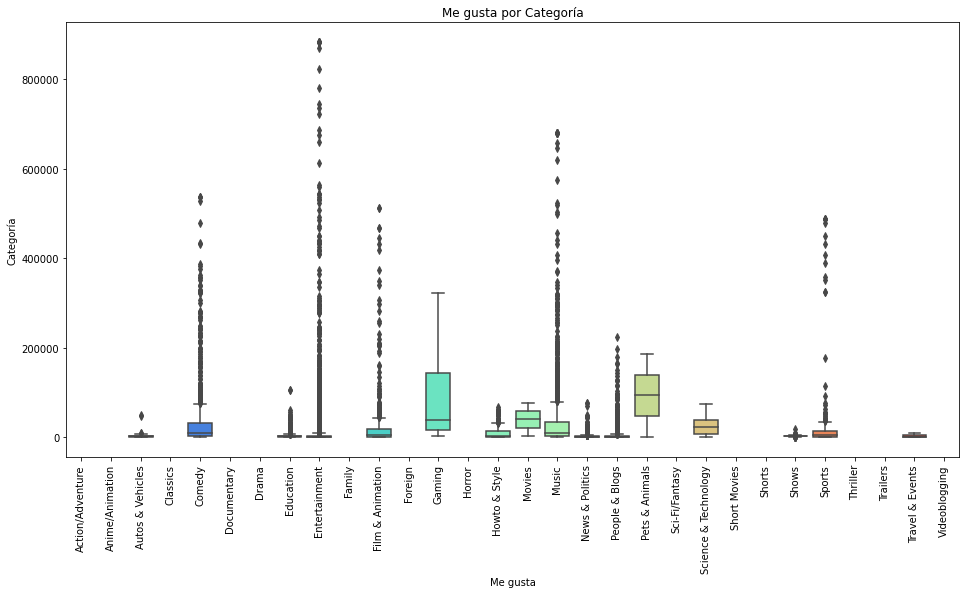

In [7]:
showCatsBy('likes','Me gusta')

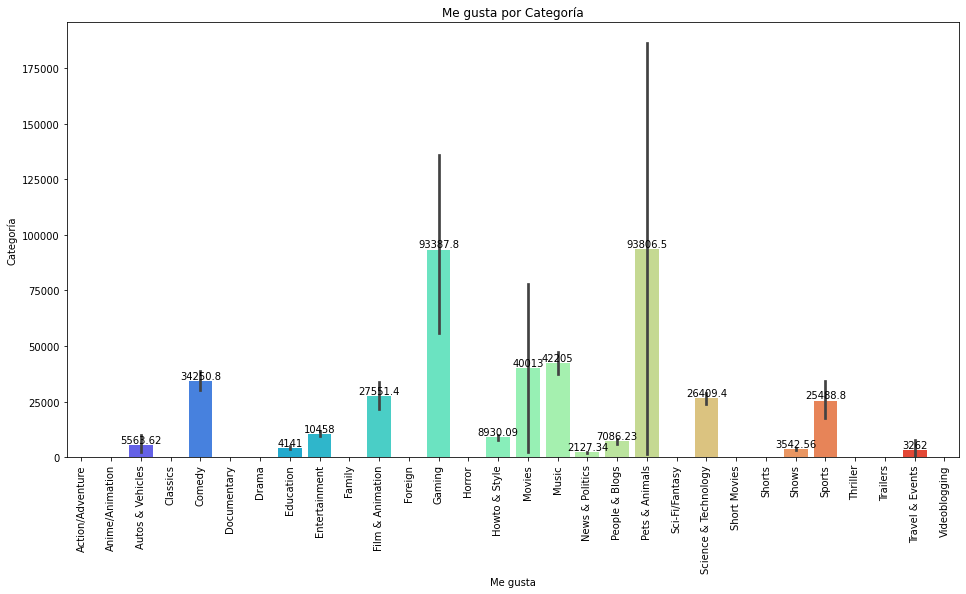

In [8]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
_lpc = sns.barplot(x="snippet.title", y="likes", data=data_cat, palette='rainbow')
_lpc.set(title='Me gusta por Categoría', ylabel="Categoría", xlabel='Me gusta')
for i in _lpc.containers: _lpc.bar_label(i,)

Las categorías con mayor cantidad consistente de likes son Pets & Animals y Gaming. Sin embargo, las categorías Music, Entertainment y Sports pueden llegar a conseguir cantidades muy grandes de "me gusta"s, aunque ello sucede con poca frecuencia.

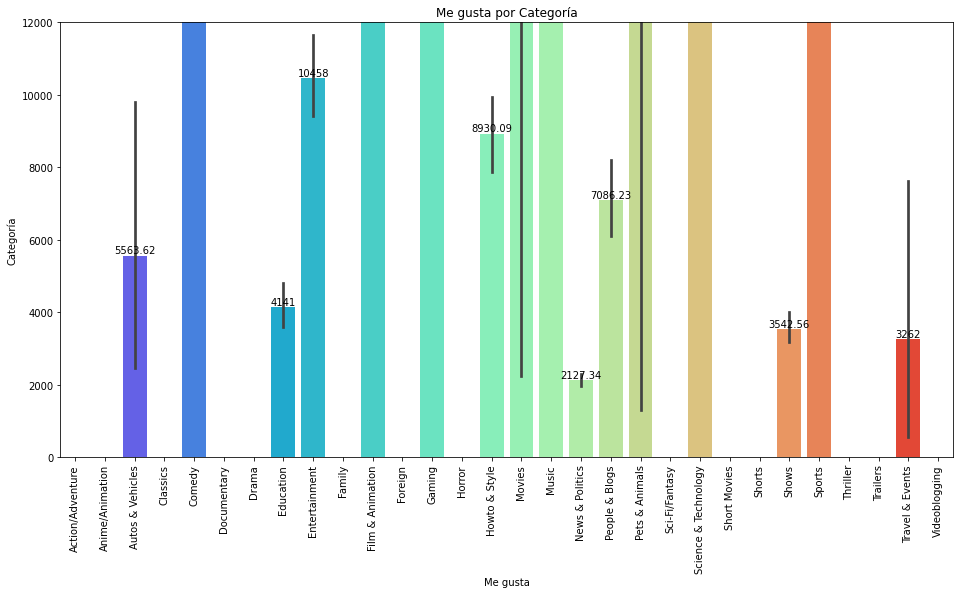

In [13]:
#plot.ylim([0, 12000])
_lpc.set(ylim=(0, 12000))
_lpc.figure

Las categorías con menor cantidad de "me gusta"", sin considerar aquellas categorías con nula cantidad de estos, son News & Politics, Travels & Events, Shows, Education y Autos & Vehicles. Las categorías con nula cantidad de likes son Action/Adventure, Anime/Animation, Classics, Documentary, Drama, Family, Foreign, Horror, Sci-Fi/Fantasy, Short Movies, Shorts, Thriller, Trailers y Videoblogging.

In [10]:
#%store data_cat